In [1]:
# Data analysis and wrannling
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train_df = pd.read_csv("D:\Learning\Titanic_ML/train.csv")
test_df = pd.read_csv("D:\Learning\Titanic_ML/test.csv")

# Combine both datasets so that we can run certain operations on both datasets together
combine = [train_df,test_df]

In [11]:
# Find the available features in the Dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Categorical: Survived, Sex, and Embarked

Ordinal: Pclass

Numerical (Continuous): Age, Fare

Numerical (Discrete): Sibsp, Parch

In [13]:
# Preview the data
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Here there are features which have the mixed data type.

Ticket has numeric and alphanumeric data.
Cabin is alpha numeric data.

In [15]:
train_df.info()
print("*"*80)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

We can see in the training data that Cabin has high rate of NUll values, after it Age has high number if null values, and then Embarked.
So order is : Cabin>Age>Embarked

Similarly, we can see same in the test data except the embarked has no null values
So order is : Cabin>Age

In [17]:
# Describe the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now lets see how each column is corelating with survived column

From the above cells some of us may think of droppping the tickets Column as it is mix of numeric and alpha numeric. But I don't see it as the reason of dropping the column as we are talking about the luck factor here and if luck exists here then can't we assume that people who had alpha-numeric dtype ticket or numeric ticket might have survied or not. 

Let's now create a column Log_ticket. We will take 1 for numeric ticket and 0 for alphanumeric.

In [32]:
# Creating a new Log_ticket Column so that we can corelate it with survived column.
train_df['Log_ticket'] = train_df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
test_df['Log_ticket'] = train_df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)

In [31]:
train_df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


In [35]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_ticket
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0


Similarly, we use Name title on same assumption. 

In [37]:
train_df['Name_Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [39]:
test_df['Name_Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [40]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_ticket,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Mrs


In [41]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Log_ticket,Name_Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1,Mr


So now we got what we want. Now we will continue with our co-relation.

In [43]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [59]:
train_df[['Log_ticket','Survived']].groupby(['Log_ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Log_ticket,Survived
1,1,0.384266
0,0,0.382609


In [46]:
train_df[['Name_Title','Survived']].groupby(['Name_Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Name_Title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [54]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [55]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [56]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


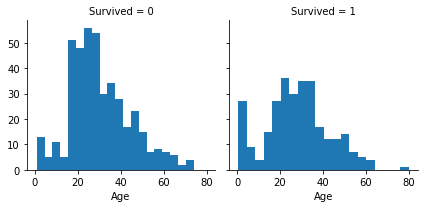

In [57]:
hist = sns.FacetGrid(train_df, col='Survived')
hist.map(plt.hist, 'Age', bins=20)

C:\Users\patil\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


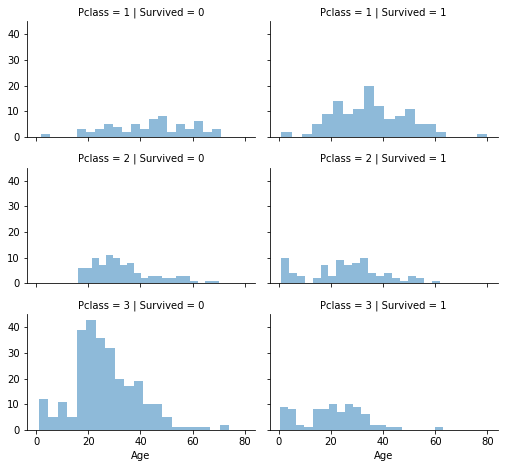

In [58]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend() 


In [61]:
# Drop ticket and Cabin Column as we have Log ticket 
# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Log_ticket   891 non-null    int64  
 11  Name_Title   891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [64]:
pd.crosstab(train_df['Name_Title'], train_df['Sex'])

Sex,female,male
Name_Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [68]:
def name_mapping(title):
    if title == 'Mr':
        return 0
    elif title == 'Miss':
        return 1
    elif title == 'Mrs':
        return 2
    elif title == 'Master':
        return 3
    else:
        return 4

In [69]:
train_df['Name_Title'] = train_df['Name_Title'].apply(name_mapping)
test_df['Name_Title'] = test_df['Name_Title'].apply(name_mapping)

In [70]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,1,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,2


In [71]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S,1,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C,1,2
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S,1,0


In [76]:
# train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
# test_df = test_df.drop(['Name'], axis=1)
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Log_ticket  891 non-null    int64  
 9   Name_Title  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non

(None, None)

In [77]:
# We still have some anamolies in AGe column
# SO, we will add mean of some ages.
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Log_ticket,Name_Title
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.741863,0.740741
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.437855,1.052077
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,4.000000


In [80]:
def titan_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [87]:
train_df['Age'] = train_df[['Age','Pclass']].apply(titan_age,axis=1)
test_df['Age'] = test_df[['Age','Pclass']].apply(titan_age,axis=1)

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Log_ticket   418 non-null    int64  
 9   Name_Title   418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    889 non-null    object 
 8   Log_ticket  891 non-null    int64  
 9   Name_Title  891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [94]:
train_df.dropna(inplace=True)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [96]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,0,2
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,2
4,0,3,male,35.0,0,0,8.0500,S,1,0
5,0,3,male,24.0,0,0,8.4583,Q,1,0
6,0,1,male,54.0,0,0,51.8625,S,1,0
7,0,3,male,2.0,3,1,21.0750,S,1,3
8,1,3,female,27.0,0,2,11.1333,S,1,2
9,1,2,female,14.0,1,0,30.0708,C,1,2


In [97]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,892,3,male,34.5,0,0,7.8292,Q,0,0
1,893,3,female,47.0,1,0,7.0000,S,0,2
2,894,2,male,62.0,0,0,9.6875,Q,0,0
3,895,3,male,27.0,0,0,8.6625,S,1,0
4,896,3,female,22.0,1,1,12.2875,S,1,2
5,897,3,male,14.0,0,0,9.2250,S,1,0
6,898,3,female,30.0,0,0,7.6292,Q,1,1
7,899,2,male,26.0,1,1,29.0000,S,1,0
8,900,3,female,18.0,0,0,7.2292,C,1,2
9,901,3,male,21.0,2,0,24.1500,S,1,0


In [98]:
combine = [train_df, test_df]

In [100]:
for d in combine:
    d['Sex']= d['Sex'].map({'female':1, 'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,0,3,0,22.0,1,0,7.2500,S,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,2
2,1,3,1,26.0,0,0,7.9250,S,0,1
3,1,1,1,35.0,1,0,53.1000,S,1,2
4,0,3,0,35.0,0,0,8.0500,S,1,0


In [101]:
for d in combine:
    d['Age'] = d['Age'].astype(int)
train_df.head()    


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,0,3,0,22,1,0,7.2500,S,0,0
1,1,1,1,38,1,0,71.2833,C,0,2
2,1,3,1,26,0,0,7.9250,S,0,1
3,1,1,1,35,1,0,53.1000,S,1,2
4,0,3,0,35,0,0,8.0500,S,1,0


In [102]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,892,3,0,34,0,0,7.8292,Q,0,0
1,893,3,1,47,1,0,7.0000,S,0,2
2,894,2,0,62,0,0,9.6875,Q,0,0
3,895,3,0,27,0,0,8.6625,S,1,0
4,896,3,1,22,1,1,12.2875,S,1,2


In [103]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title
0,0,3,0,1,1,0,7.2500,S,0,0
1,1,1,1,2,1,0,71.2833,C,0,2
2,1,3,1,1,0,0,7.9250,S,0,1
3,1,1,1,2,1,0,53.1000,S,1,2
4,0,3,0,2,0,0,8.0500,S,1,0


In [104]:
for d in combine:
    d['Family']=d['SibSp']+d['Parch']+1

train_df.head()

for d in combine:
    d['Isalone'] = 0
    d.loc[d['Family']==1, 'Isalone']= 1
train_df.head()
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_ticket,Name_Title,Family,Isalone
0,892,3,0,2,0,0,7.8292,Q,0,0,1,1
1,893,3,1,2,1,0,7.0000,S,0,2,2,0
2,894,2,0,3,0,0,9.6875,Q,0,0,1,1
3,895,3,0,1,0,0,8.6625,S,1,0,1,1
4,896,3,1,1,1,1,12.2875,S,1,2,3,0


In [106]:
train_df = train_df.drop(['Parch', 'SibSp', 'Family'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'Family'], axis=1)
combine = [train_df, test_df]

In [107]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Log_ticket,Name_Title,Isalone
0,0,3,0,1,7.2500,S,0,0,0
1,1,1,1,2,71.2833,C,0,2,0
2,1,3,1,1,7.9250,S,0,1,1
3,1,1,1,2,53.1000,S,1,2,0
4,0,3,0,2,8.0500,S,1,0,1


In [108]:
for d in combine:
    d['Embarked'] = d['Embarked'].map({'S':0,'C':1, 'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Log_ticket,Name_Title,Isalone
0,0,3,0,1,7.2500,0,0,0,0
1,1,1,1,2,71.2833,1,0,2,0
2,1,3,1,1,7.9250,0,0,1,1
3,1,1,1,2,53.1000,0,1,2,0
4,0,3,0,2,8.0500,0,1,0,1


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    889 non-null    int64
 1   Pclass      889 non-null    int64
 2   Sex         889 non-null    int32
 3   Age         889 non-null    int32
 4   Fare        889 non-null    int32
 5   Embarked    889 non-null    int32
 6   Log_ticket  889 non-null    int64
 7   Name_Title  889 non-null    int64
 8   Isalone     889 non-null    int64
dtypes: int32(4), int64(5)
memory usage: 55.6 KB


In [112]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Log_ticket   418 non-null    int64  
 7   Name_Title   418 non-null    int64  
 8   Isalone      418 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 24.6 KB


In [114]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [115]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Log_ticket,Name_Title,Isalone
0,0,3,0,1,0,0,0,0,0
1,1,1,1,2,0,1,0,2,0
2,1,3,1,1,0,0,0,1,1
3,1,1,1,2,0,0,1,2,0
4,0,3,0,2,0,0,1,0,1


In [116]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Log_ticket,Name_Title,Isalone
0,892,3,0,2,0,2,0,0,1
1,893,3,1,2,0,0,0,2,0
2,894,2,0,3,0,2,0,0,1
3,895,3,0,1,0,0,1,0,1
4,896,3,1,1,0,0,1,2,0


In [117]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (418, 8))

In [118]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.07

In [119]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.29

In [120]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn 


82.23

In [121]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.18

In [122]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

70.98

In [123]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


78.52

In [124]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.52

In [125]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.49

In [126]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.49

In [127]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.49
8,Decision Tree,85.49
1,KNN,82.23
6,Stochastic Gradient Decent,78.52
7,Linear SVC,78.52
0,Support Vector Machines,78.29
4,Naive Bayes,78.18
2,Logistic Regression,78.07
5,Perceptron,70.98


In [128]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('D:\Learning\Titanic_ML/submission.csv', index=False)